In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

### prepare

In [53]:
test=pd.read_excel('option_test_feature_added.xlsx')
train=pd.read_excel('option_train_feature_added.xlsx')
test.head()

,Unnamed: 0,Value,S,K,tau,r,BS,BS_binary,KS_ratio,KS_diff,...,KS_tau_ratio,r_asset,risk_free_rate_abs,risk_free_rate_prop,S_expected,S_bin,K_bin,r_bin,is_low_K,is_high_r
0,1675,NaN,431.618600,460,0.293651,0.03147,NaN,NaN,1.065756,28.381400,...,3.629330,0.242183,0.210713,0.870057,455.833554,1,4,5,0,1
1,1676,NaN,432.633296,420,0.182540,0.03147,NaN,NaN,0.970799,-12.633296,...,5.318291,-0.149858,-0.181328,1.209998,417.631191,1,2,5,0,1
2,1677,NaN,432.633296,430,0.182540,0.03147,NaN,NaN,0.993913,-2.633296,...,5.444916,-0.032893,-0.064363,1.956735,427.574791,1,2,5,0,1
3,1678,NaN,431.618600,415,0.293651,0.03147,NaN,NaN,0.961497,-16.618600,...,3.274287,-0.125156,-0.156626,1.251447,411.241141,1,1,5,0,1
4,1679,NaN,434.772855,420,0.043651,0.03147,NaN,NaN,0.966022,-14.772855,...,22.130678,-0.547037,-0.578507,1.057528,419.432326,2,2,5,0,1


In [51]:
# X_train=train.loc[:,rankedvariable]
# X_test=test.loc[:,rankedvariable]

In [3]:
X_train,X_test=train_test_split(train,test_size=0.3,random_state=2,stratify=train['BS_binary'])

### start here

In [3]:
trainset=pd.read_csv('train.csv',index_col=0)
trainset.head(2)

,Value,S,K,tau,r,BS,BS_binary,KS_ratio,KS_diff,risk_free_FV,...,KS_tau_ratio,r_asset,risk_free_rate_abs,risk_free_rate_prop,S_expected,S_bin,K_bin,r_bin,is_low_K,is_high_r
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
688,13.026420,443.816419,440,0.257937,0.03003,Under,0,0.991401,-3.816419,447.216498,...,3.843585,-0.032928,-0.062958,1.911993,436.654786,3,3,2,0,0
1078,0.125001,448.076828,500,0.313492,0.02972,Over,1,1.115880,51.923172,452.209662,...,3.559516,0.418711,0.388991,0.929020,495.430401,5,5,1,0,0


In [4]:
testset=pd.read_csv('test.csv',index_col=0)
testset.head(2)

,Value,S,K,tau,r,BS,BS_binary,KS_ratio,KS_diff,risk_free_FV,...,KS_tau_ratio,r_asset,risk_free_rate_abs,risk_free_rate_prop,S_expected,S_bin,K_bin,r_bin,is_low_K,is_high_r
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1274,32.175766,429.314292,400,0.150794,0.03085,Under,0,0.931718,-29.314292,431.285782,...,6.178764,-0.374383,-0.405233,1.082402,398.171524,1,1,5,1,0
1527,0.345000,447.580024,465,0.087302,0.02982,Over,1,1.038920,17.419976,448.729662,...,11.900361,0.548611,0.518791,0.945645,463.808677,4,5,2,0,0


In [5]:
basic_var=['r','K','tau','S']

In [4]:
class_rankedvariable = ['KS_ratio',
 'risk_free_FV',
 'r_bin',
 'is_low_K',
 'S_bin',
 'KS_tau_ratio',
 'S_expected',
 'r',
 'K_bin',
 'r_asset',
 'risk_free_gap_abs',
 'K',
 'risk_free_rate_abs',
 'is_high_r',
 'KS_diff',
 'tau',
 'S',
 'risk_free_rate_prop',
 'risk_free_gap_prop']
len(class_rankedvariable)

19

In [8]:
reg_rankedvariable=['risk_free_gap_abs', 'tau', 'risk_free_rate_prop', 'risk_free_FV',
                    'K', 'KS_tau_ratio', 'r_asset', 'K_bin', 'is_high_r', 'r_bin', 'r',
                    'S', 'is_low_K', 'KS_diff', 'risk_free_gap_prop', 'KS_ratio',
                    'S_bin', 'risk_free_rate_abs', 'S_expected']
len(reg_rankedvariable)

19

In [6]:
Y_train_num = pd.DataFrame(trainset.loc[:,'Value'])
Y_train_cat = pd.DataFrame(trainset.loc[:,'BS_binary'])

In [7]:
Y_train_num = pd.DataFrame(trainset.loc[:,'Value'])
Y_train_cat = pd.DataFrame(trainset.loc[:,'BS_binary'])
Y_test_num = pd.DataFrame(testset.loc[:,'Value'])
Y_test_cat = pd.DataFrame(testset.loc[:,'BS_binary'])

In [6]:
varnum=[3,5,10,15,19]

### Linear

In [12]:
# basic var
kfolds_regression = KFold(n_splits = 5, random_state = 1, shuffle = True) 
regresssion_model = LinearRegression()

var_to_consider=['r','K','tau','S']
X_train=trainset[var_to_consider]
X_test=testset[var_to_consider]
r2_model_1_cv = cross_val_score(regresssion_model, X_train, Y_train_num.values.ravel(), 
                                    cv=kfolds_regression,scoring='r2')
adj_r2=1-(1-np.mean(r2_model_1_cv))*(len(trainset)-1)/(len(trainset)-4-1)
best_lm = regresssion_model.fit(X_train, Y_train_num.values.ravel())
test_pred = best_lm.predict(X_test)
test_score = r2_score(y_true = Y_test_num, y_pred = test_pred)
print(f"r2 for Train Value: {r2_model_1_cv}\nmean r2: {np.mean(r2_model_1_cv)}\nadjusted r2: {adj_r2}")
print(f'the best test score: {test_score}\n')

r2 for Train Value: [0.90101548 0.89770844 0.91766737 0.92286711 0.90376414]
mean r2: 0.908604506186391
adjusted r2: 0.9082912397123084
the best test score: 0.9124915375439029



In [9]:
kfolds_regression = KFold(n_splits = 5, random_state = 1, shuffle = True) 
regresssion_model = LinearRegression()
for i in varnum:
    print(f'-- variables to consider: {i} --')
    var_to_consider=reg_rankedvariable[:i]
    X_train=trainset[var_to_consider]
    X_test=testset[var_to_consider]
    r2_model_1_cv = cross_val_score(regresssion_model, X_train, Y_train_num.values.ravel(), 
                                    cv=kfolds_regression,scoring='r2')
    adj_r2=1-(1-np.mean(r2_model_1_cv))*(len(trainset)-1)/(len(trainset)-i-1)
    best_lm = regresssion_model.fit(X_train, Y_train_num.values.ravel())
    test_pred = best_lm.predict(X_test)
    test_score = r2_score(y_true = Y_test_num, y_pred = test_pred)
    print(f"r2 for Train Value: {r2_model_1_cv}\nmean r2: {np.mean(r2_model_1_cv)}\nadjusted r2: {adj_r2}")
    print(f'the best test score: {test_score}\n')

-- variables to consider: 3 --
r2 for Train Value: [0.90102576 0.89741859 0.91806814 0.92271792 0.90387966]
mean r2: 0.9086220172226456
adjusted r2: 0.9083873134997585
the best test score: 0.9121968167598762

-- variables to consider: 5 --
r2 for Train Value: [0.90055498 0.89786329 0.91810496 0.92262489 0.90367175]
mean r2: 0.908563975866668
adjusted r2: 0.9081718831388236
the best test score: 0.9115015945273724

-- variables to consider: 10 --
r2 for Train Value: [0.89892055 0.89899565 0.92018221 0.92338726 0.90334296]
mean r2: 0.908965727293166
adjusted r2: 0.9081816250304027
the best test score: 0.9144359509687237

-- variables to consider: 15 --
r2 for Train Value: [0.9802915  0.98706906 0.98896129 0.98605047 0.98594374]
mean r2: 0.9856632142091197
adjusted r2: 0.9854771832516256
the best test score: 0.9850534183420538

-- variables to consider: 19 --
r2 for Train Value: [0.99215485 0.99289668 0.99398559 0.99253754 0.99299887]
mean r2: 0.9929147049346023
adjusted r2: 0.992797846769

#### useless

In [38]:
kfolds_regression = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 21))}]

lm = LinearRegression()
lm.fit(X_train, Y_train_num)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = kfolds_regression, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train_num)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20]}],
             return_train_score=True, scoring='r2', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.loc[:,['param_n_features_to_select','mean_test_score','mean_train_score']]

,param_n_features_to_select,mean_test_score,mean_train_score
0,1,0.527204,0.528763
1,2,0.878955,0.880505
2,3,0.879494,0.880628
3,4,0.910594,0.912097
4,5,0.910195,0.910582
5,6,0.910437,0.912260
6,7,0.910593,0.912591
7,8,0.910782,0.912087
8,9,0.911894,0.913715
9,10,0.992028,0.992242


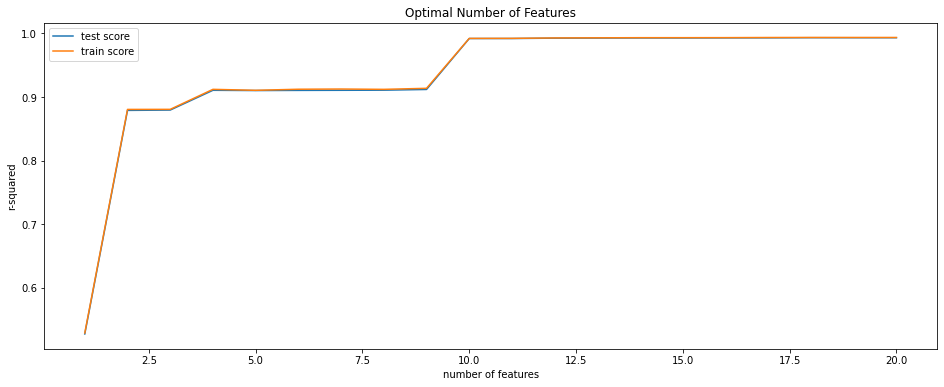

In [40]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [41]:
# final model
n_features_optimal = 9

lm = LinearRegression()
lm.fit(X_train, Y_train_num)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train_num)

# predict prices of X_test
Y_pred_num = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test_num, Y_pred_num)
print(r2)

0.9931929436640493


### Logistic

In [13]:
kfolds_regresssion = KFold(n_splits = 5, random_state = 1, shuffle = True) 
logistic_model = LogisticRegression(penalty='none', max_iter = 10000)
var_to_consider=['r','K','tau','S']
X_train=trainset[var_to_consider]
X_test=testset[var_to_consider]
acc_model_2_cv = cross_val_score(logistic_model, X_train, Y_train_cat.values.ravel(), cv=kfolds_regresssion,scoring='accuracy')
best_lm = logistic_model.fit(X_train, Y_train_cat.values.ravel())
test_pred = best_lm.predict(X_test)
test_score = accuracy_score(y_true = Y_test_cat, y_pred = test_pred)
print(f"accuracy for Train BS_binary: {acc_model_2_cv} \nmean accuracy: {np.mean(acc_model_2_cv)})")
print(f'the best test score: {test_score}\n')

accuracy for Train BS_binary: [0.90638298 0.92340426 0.91452991 0.93162393 0.9017094 ] 
mean accuracy: 0.9155300963811603)
the best test score: 0.8986083499005965



In [17]:
kfolds_regresssion = KFold(n_splits = 5, random_state = 1, shuffle = True) 
logistic_model = LogisticRegression(penalty='none', max_iter = 10000)
for i in varnum:
    print(f'-- variables to consider: {i} --')
    var_to_consider=class_rankedvariable[:i]
    X_train=trainset[var_to_consider]
    X_test=testset[var_to_consider]
    acc_model_2_cv = cross_val_score(logistic_model, X_train, Y_train_cat.values.ravel(), cv=kfolds_regresssion,scoring='accuracy')
    best_lm = logistic_model.fit(X_train, Y_train_cat.values.ravel())
    test_pred = best_lm.predict(X_test)
    test_score = accuracy_score(y_true = Y_test_cat, y_pred = test_pred)
    print(f"accuracy for Train BS_binary: {acc_model_2_cv} \nmean accuracy: {np.mean(acc_model_2_cv)})")
    print(f'the best test score: {test_score}\n')

-- variables to consider: 3 --
accuracy for Train BS_binary: [0.91489362 0.92765957 0.90598291 0.93589744 0.9017094 ] 
mean accuracy: 0.9172285870158211)
the best test score: 0.8906560636182903

-- variables to consider: 5 --
accuracy for Train BS_binary: [0.91489362 0.91914894 0.90598291 0.91880342 0.88034188] 
mean accuracy: 0.9078341516639388)
the best test score: 0.9085487077534792

-- variables to consider: 10 --
accuracy for Train BS_binary: [0.91914894 0.92765957 0.91880342 0.93589744 0.9017094 ] 
mean accuracy: 0.9206437534097109)
the best test score: 0.9165009940357853

-- variables to consider: 15 --
accuracy for Train BS_binary: [0.91914894 0.93191489 0.91880342 0.92735043 0.89316239] 
mean accuracy: 0.9180760138206947)
the best test score: 0.9125248508946322

-- variables to consider: 19 --
accuracy for Train BS_binary: [0.91914894 0.92765957 0.91452991 0.92307692 0.8974359 ] 
mean accuracy: 0.9163702491362067)
the best test score: 0.9125248508946322



### Random Forest

In [18]:
# accuracy, BS_binary
for i in varnum:   
    print(f'-- variables to consider: {i} --')
    var_to_consider=class_rankedvariable[:i]
    X_train=trainset[var_to_consider]
    X_test=testset[var_to_consider]
    rfc = RandomForestClassifier()
    forest_params = [{'n_estimators':list(range(10, 100,10)),'max_depth': list(range(5, 30,5)),
                     'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}]
    clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='accuracy')
    grid_result_rfc=clf.fit(X_train, Y_train_cat.values.ravel())
    best_params_rfc = grid_result_rfc.best_params_
    best_score = grid_result_rfc.best_score_
    
    best_rfc = RandomForestClassifier(n_estimators=best_params_rfc['n_estimators'],
                                     max_depth=best_params_rfc['max_depth'],
                                     min_samples_split=best_params_rfc['min_samples_split'],
                                     min_samples_leaf=best_params_rfc['min_samples_leaf'])
    best_rfc.fit(X_train, Y_train_cat.values.ravel())
    test_pred = best_rfc.predict(X_test)
    test_score = accuracy_score(y_true = Y_test_cat, y_pred = test_pred)
    print(f'the best set of parameters: {best_params_rfc}') 
    print(f'the best train score: {best_score}') 
    print(f'the best test score: {test_score}\n')

-- variables to consider: 3 --
the best set of parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
the best train score: 0.9292016730314602
the best test score: 0.9204771371769384

-- variables to consider: 5 --
the best set of parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
the best train score: 0.9283396981269323
the best test score: 0.9264413518886679

-- variables to consider: 10 --
the best set of parameters: {'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
the best train score: 0.9274959083469723
the best test score: 0.9324055666003976

-- variables to consider: 15 --
the best set of parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 60}
the best train score: 0.9274849972722313
the best test score: 0.9324055666003976

-- variables to consider: 19 --
the best set of parameters: {'max_depth': 10, 'min_samples_le

In [11]:
# r2, Value
for i in varnum:   
    print(f'-- variables to consider: {i} --')
    var_to_consider=reg_rankedvariable[:i]
    X_train=trainset[var_to_consider]
    X_test=testset[var_to_consider]
    rfr = RandomForestRegressor()
    forest_params = [{'n_estimators':list(range(10, 100,10)),'max_depth': list(range(5, 31,5)),
                     'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}]
    clf = GridSearchCV(rfr, forest_params, cv = 5, scoring='r2')
    grid_result_rfr=clf.fit(X_train, Y_train_num.values.ravel())
    best_params_rfr = grid_result_rfr.best_params_
    best_score = grid_result_rfr.best_score_
    
    best_rfr = RandomForestRegressor(n_estimators=best_params_rfr['n_estimators'],
                                     max_depth=best_params_rfr['max_depth'],
                                     min_samples_split=best_params_rfr['min_samples_split'],
                                     min_samples_leaf=best_params_rfr['min_samples_leaf'])
    best_rfr.fit(X_train, Y_train_num.values.ravel())
    test_pred = best_rfr.predict(X_test)
    test_score = r2_score(y_true = Y_test_num, y_pred = test_pred)
    print(f'the best set of parameters: {best_params_rfr}') 
    print(f'the best train score: {best_score}') 
    print(f'the best test score: {test_score}\n')

-- variables to consider: 3 --
the best set of parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}
the best train score: 0.9984112369020008
the best test score: 0.9988727353093056

-- variables to consider: 5 --
the best set of parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
the best train score: 0.9983670872228998
the best test score: 0.9988822654792106

-- variables to consider: 10 --
the best set of parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}
the best train score: 0.9983853502543638
the best test score: 0.9989072567038196

-- variables to consider: 15 --
the best set of parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
the best train score: 0.9982747638036912
the best test score: 0.9987324229137176

-- variables to consider: 19 --
the best set of parameters: {'max_depth': 10, 'min_samples_lea

### backup

In [10]:
# r2, Value
for i in varnum:   
    print(f'-- variables to consider: {i} --')
    var_to_consider=reg_rankedvariable[:i]
    X_train=trainset[var_to_consider]
    X_test=testset[var_to_consider]
    rfr = RandomForestRegressor()
    forest_params = [{'n_estimators':list(range(10, 100,10)),'max_depth': list(range(5, 30,5))}]
    clf = GridSearchCV(rfr, forest_params, cv = 5, scoring='r2')
    grid_result_rfr=clf.fit(X_train, Y_train_num.values.ravel())
    best_params_rfr = grid_result_rfr.best_params_
    best_score = grid_result_rfr.best_score_
    
    best_rfr = RandomForestRegressor(n_estimators=best_params_rfr['n_estimators'],
                                     max_depth=best_params_rfr['max_depth'])
    best_rfr.fit(X_train, Y_train_num.values.ravel())
    test_pred = best_rfr.predict(X_test)
    test_score = r2_score(y_true = Y_test_num, y_pred = test_pred)
    print(f'the best set of parameters: {best_params_rfr}') 
    print(f'the best train score: {best_score}') 
    print(f'the best test score: {test_score}\n')

-- variables to consider: 3 --


KeyboardInterrupt: 

In [10]:
# r2, BS_binary
for i in varnum:   
    print(f'-- variables to consider: {i} --')
    var_to_consider=rankedvariable[:i]
    X_train=trainset[var_to_consider]
    X_test=testset[var_to_consider]
    rfc = RandomForestClassifier()
    forest_params = [{'n_estimators':list(range(10, 100,10)),'max_depth': list(range(5, 30,5))}]
    clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='r2')
    clf.fit(X_train, Y_train_cat.values.ravel())
    print(clf.best_params_)
    print(clf.best_score_)

-- variables to consider: 3 --
{'max_depth': 20, 'n_estimators': 90}
0.6459557985873776
-- variables to consider: 5 --
{'max_depth': 10, 'n_estimators': 50}
0.6494317344162546
-- variables to consider: 10 --
{'max_depth': 5, 'n_estimators': 10}
0.6633468698484178
-- variables to consider: 15 --
{'max_depth': 5, 'n_estimators': 60}
0.6772050446973049
-- variables to consider: 20 --
{'max_depth': 20, 'n_estimators': 90}
0.6737518931017383


In [44]:
kfolds_regression = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 21))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, Y_train_cat)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = kfolds_regression, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train_cat)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20]}],
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.loc[:,['param_n_features_to_select','mean_test_score','mean_train_score']]

,param_n_features_to_select,mean_test_score,mean_train_score
0,1,0.250445,0.255273
1,2,0.627130,0.628912
2,3,0.626570,0.628794
3,4,0.625781,0.629507
4,5,0.625433,0.629611
5,6,0.627351,0.631693
6,7,0.628878,0.632912
7,8,0.628794,0.633282
8,9,0.632132,0.635605
9,10,0.631467,0.636773


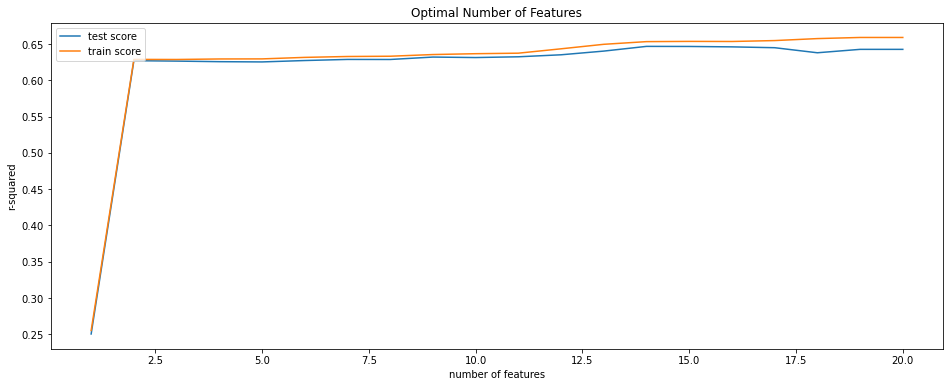

In [47]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [54]:
# final model
n_features_optimal = 14

lm = LinearRegression()
lm.fit(X_train, Y_train_cat)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train_cat)

# predict prices of X_test
Y_pred_cat = lm.predict(X_test)
# r2 = sklearn.metrics.r2_score(y_test, Y_pred_cat)
# print(r2)